<a href="https://colab.research.google.com/github/napsterpk/UOIT/blob/master/ROC%5B1%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import sys
import sklearn
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras import regularizers
from keras.models import Model
from keras.models import Sequential
from keras.layers import LSTM
from numpy import array

In [ ]:
df=pd.read_parquet('/content/drive/My Drive/Colab Notebooks/Dataset/Dataset[S]/Dataset[6]/Dataset[3N].parquet', engine='pyarrow')


print()
print()
print('Data Loaded Succesfully')
print()
print()



Data Loaded Succesfully




In [ ]:
#print(df[['Label', 'Cat']].groupby(['Label', 'Cat']).size())
print()
print()
df.columns

Index(['Flow_ID', 'Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol',
       'Timestamp', 'Flow_Duration', 'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts',
       'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts', 'Fwd_Pkt_Len_Max',
       'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean', 'Fwd_Pkt_Len_Std',
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min', 'Bwd_Pkt_Len_Mean',
       'Bwd_Pkt_Len_Std', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags', 'Fwd_URG_Flags',
       'Bwd_URG_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len', 'Fwd_Pkts/s',
       'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max', 'Pkt_Len_Mean',
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt', 'SYN_Flag_Cnt',
       'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt', 'URG_Flag_Cnt',
       'CWE_Flag_Count', 'ECE_

In [ ]:
df=df[['Src_Port', 'Dst_Port', 'Protocol', 'Timestamp', 'Flow_Duration','Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts','Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean','Fwd_Pkt_Len_Std', 
       'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min','Bwd_Pkt_Len_Mean', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean','Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot','Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 
       'Fwd_IAT_Min','Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max','Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len','Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max','Pkt_Len_Mean', 
       'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt','SYN_Flag_Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt','Down/Up_Ratio', 'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg', 'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg', 
       'Subflow_Fwd_Pkts','Subflow_Fwd_Byts', 'Subflow_Bwd_Byts', 'Init_Fwd_Win_Byts','Init_Bwd_Win_Byts', 'Fwd_Act_Data_Pkts', 'Fwd_Seg_Size_Min','Idle_Mean', 'Idle_Std', 'Idle_Max', 'Idle_Min','Label']]
print(df.shape)

(1431888, 65)


In [ ]:
df.columns

Index(['Src_Port', 'Dst_Port', 'Protocol', 'Timestamp', 'Flow_Duration',
       'Tot_Fwd_Pkts', 'Tot_Bwd_Pkts', 'TotLen_Fwd_Pkts', 'TotLen_Bwd_Pkts',
       'Fwd_Pkt_Len_Max', 'Fwd_Pkt_Len_Min', 'Fwd_Pkt_Len_Mean',
       'Fwd_Pkt_Len_Std', 'Bwd_Pkt_Len_Max', 'Bwd_Pkt_Len_Min',
       'Bwd_Pkt_Len_Mean', 'Flow_Byts/s', 'Flow_Pkts/s', 'Flow_IAT_Mean',
       'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min', 'Fwd_IAT_Tot',
       'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max', 'Fwd_IAT_Min',
       'Bwd_IAT_Tot', 'Bwd_IAT_Mean', 'Bwd_IAT_Std', 'Bwd_IAT_Max',
       'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Fwd_Header_Len', 'Bwd_Header_Len',
       'Fwd_Pkts/s', 'Bwd_Pkts/s', 'Pkt_Len_Min', 'Pkt_Len_Max',
       'Pkt_Len_Mean', 'Pkt_Len_Std', 'Pkt_Len_Var', 'FIN_Flag_Cnt',
       'SYN_Flag_Cnt', 'RST_Flag_Cnt', 'PSH_Flag_Cnt', 'ACK_Flag_Cnt',
       'Down/Up_Ratio', 'Pkt_Size_Avg', 'Fwd_Seg_Size_Avg', 'Bwd_Seg_Size_Avg',
       'Bwd_Pkts/b_Avg', 'Bwd_Blk_Rate_Avg', 'Subflow_Fwd_Pkts',
       'Subflow_

In [ ]:
X = df.drop('Label',1)
y = df.Label

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
#from sklearn.preprocessing import label_binarize
#y = label_binarize(y, classes=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [ ]:
#print(df.columns)
print()
print()
print(X.shape)



(1431888, 64)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [ ]:
# Class weights for unbalanced classes
u, indices = np.unique(y, return_counts=True)
print()
print('Label : ',u)
print()
print()
print('Lable Instances : ',indices)
print()
print()
print('Class Weight')
print()
class_weight = {}
for a,b in zip(list(u),list(1/(indices/indices.max()+0.01))):
    class_weight[a] = b
print(class_weight)


Label :  [0. 1.]


Lable Instances :  [ 226451 1205437]


Class Weight

{0.0: 5.054129389204109, 1.0: 0.9900990099009901}


In [ ]:
x_train.shape

(1002321, 64)

In [ ]:
# Feature scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
print(x_train.shape)

(1002321, 64)


In [ ]:
print(x_train.shape)
print(x_test.shape)

print(y_train.shape)
print(y_test.shape)

(1002321, 64)
(429567, 64)
(1002321,)
(429567,)


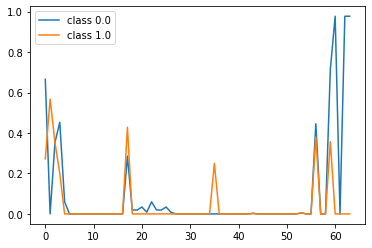

In [ ]:
# Feature scaling
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)


classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure()
for c in classes:
    c_x_train = x_train[y_train == c]
    plt.plot(c_x_train[0], label="class " + str(c))
plt.legend(loc="best")
plt.show()
plt.close()

In [ ]:
print()
print('Number of insances ',x_train.shape[0])
print()
print()
print('Number of Features',x_train.shape[1])


Number of insances  1002321


Number of Features 64


In [ ]:
x_shape = x_train.shape[1]
x_shape

64

In [ ]:
Inputs_1= tf.keras.Input(shape=(x_shape,), name='Inputs_1')
#Inputs_2 = tf.keras.Input(shape=(input_shape2,), name='Inputs_2')
#Inputs_3 = tf.keras.Input(shape=(input_shape3,), name='Inputs_3')



#merge = tf.keras.layers.concatenate([Inputs_1,Inputs_3], name='merging')

hidden1 = tf.keras.layers.Dense(512, activation='relu', name='Hidden-Layer-1')(Inputs_1)
hidden2 = tf.keras.layers.Dense(512, activation='relu', name='Hidden-Layer-2')(hidden1)
hidden3 = tf.keras.layers.Dense(512, activation='relu', name='Hidden-Layer-3')(hidden2)
hidden4 = tf.keras.layers.Dense(512, activation='relu', name='Hidden-Layer-4')(hidden3)


den = keras.layers.Dense(256, activation="relu",name="Densel1")(hidden4)
classif = tf.keras.layers.Dense(17, activation='softmax', name='Output-Layer')(den)

model = tf.keras.Model(inputs=[Inputs_1], outputs=classif)

model.summary()
#tf.keras.utils.plot_model(model, 'multi_input.png', show_shapes=True)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Inputs_1 (InputLayer)       [(None, 64)]              0         
                                                                 
 Hidden-Layer-1 (Dense)      (None, 512)               33280     
                                                                 
 Hidden-Layer-2 (Dense)      (None, 512)               262656    
                                                                 
 Hidden-Layer-3 (Dense)      (None, 512)               262656    
                                                                 
 Hidden-Layer-4 (Dense)      (None, 512)               262656    
                                                                 
 Densel1 (Dense)             (None, 256)               131328    
                                                                 
 Output-Layer (Dense)        (None, 17)                4369  

In [ ]:
# Checkpoint Path

path="/content/drive/My Drive/Colab Notebooks/Save Models/FFN/Combined/Dataset[3]"

checkpoint_path = path+"/weights_best_loss.hdf5"



mnn_callbacks = [tf.keras.callbacks.EarlyStopping(monitor='loss', patience=50, verbose=1),
                tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=50, min_lr=0.0001),
                tf.keras.callbacks.ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, verbose=1, mode="min")]

In [ ]:
epochs = 5
batch_size = 1024

optz=keras.optimizers.Adam(learning_rate=0.0001)

model.compile(optimizer=optz, loss="sparse_categorical_crossentropy", metrics=["accuracy"],)

history = model.fit({'Inputs_1': x_train}, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2, shuffle=False, class_weight=class_weight, callbacks=mnn_callbacks)

Epoch 1/5
780/784 [============================>.] - ETA: 0s - loss: 0.2571 - accuracy: 0.9773
Epoch 1: val_loss improved from inf to 0.01081, saving model to /content/drive/My Drive/Colab Notebooks/Save Models/FFN/Combined/Dataset[3]/weights_best_loss.hdf5
784/784 [==============================] - 16s 18ms/step - loss: 0.2562 - accuracy: 0.9774 - val_loss: 0.0108 - val_accuracy: 0.9975 - lr: 1.0000e-04
Epoch 2/5
780/784 [============================>.] - ETA: 0s - loss: 0.0189 - accuracy: 0.9974
Epoch 2: val_loss improved from 0.01081 to 0.00783, saving model to /content/drive/My Drive/Colab Notebooks/Save Models/FFN/Combined/Dataset[3]/weights_best_loss.hdf5
784/784 [==============================] - 9s 11ms/step - loss: 0.0189 - accuracy: 0.9974 - val_loss: 0.0078 - val_accuracy: 0.9980 - lr: 1.0000e-04
Epoch 3/5
780/784 [============================>.] - ETA: 0s - loss: 0.0130 - accuracy: 0.9978
Epoch 3: val_loss improved from 0.00783 to 0.00712, saving model to /content/drive/My 

In [ ]:
model.load_weights(checkpoint_path)

test_loss, test_acc = model.evaluate(x_test, y_test,batch_size=256)
print()
print()
print('Test Accuracy :', (round((test_acc*100),2)),'%          ','Test Loss :',round(test_loss,6))

1678/1678 [==============================] - 8s 5ms/step - loss: 0.0060 - accuracy: 0.9984


Test Accuracy : 99.84 %           Test Loss : 0.006031


In [ ]:
y_pred=np.argmax(model.predict(x_test), axis=-1)

In [ ]:
n_classes = len(np.unique(y))
print('Number of Classes',n_classes)

Number of Classes 2


In [ ]:
n_classes

2

In [ ]:
np.savetxt("/content/drive/My Drive/Colab Notebooks/y_pred.csv", y_pred, delimiter=",")
np.savetxt("/content/drive/My Drive/Colab Notebooks/y_test.csv", y_test, delimiter=",")


In [ ]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [ ]:
print(type(y_pred))

<class 'numpy.ndarray'>


In [ ]:
y_test

708760     1.0
1283745    1.0
484672     1.0
848621     0.0
155896     1.0
          ... 
288467     1.0
1317145    1.0
940156     0.0
90470      1.0
224560     1.0
Name: Label, Length: 429567, dtype: float64

In [ ]:
print(y_test)
print(y_pred)

708760     1.0
1283745    1.0
484672     1.0
848621     0.0
155896     1.0
          ... 
288467     1.0
1317145    1.0
940156     0.0
90470      1.0
224560     1.0
Name: Label, Length: 429567, dtype: float64
[1 1 1 ... 0 1 1]


In [ ]:
print(type(y_test))

<class 'pandas.core.series.Series'>


In [ ]:
y_test

708760     1.0
1283745    1.0
484672     1.0
848621     0.0
155896     1.0
          ... 
288467     1.0
1317145    1.0
940156     0.0
90470      1.0
224560     1.0
Name: Label, Length: 429567, dtype: float64

In [ ]:
y_test1 = y_test.to_numpy()

print(type(y_test))

<class 'pandas.core.series.Series'>


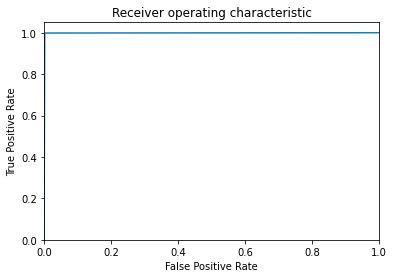

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_pred)
    roc_auc[i] = auc(fpr[i], tpr[i])

#print roc_auc_score(y_test, y_pred)
plt.figure()
plt.plot(fpr[1], tpr[1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [ ]:

y_pred

array([1, 1, 1, ..., 0, 1, 1])

<Figure size 432x288 with 0 Axes>

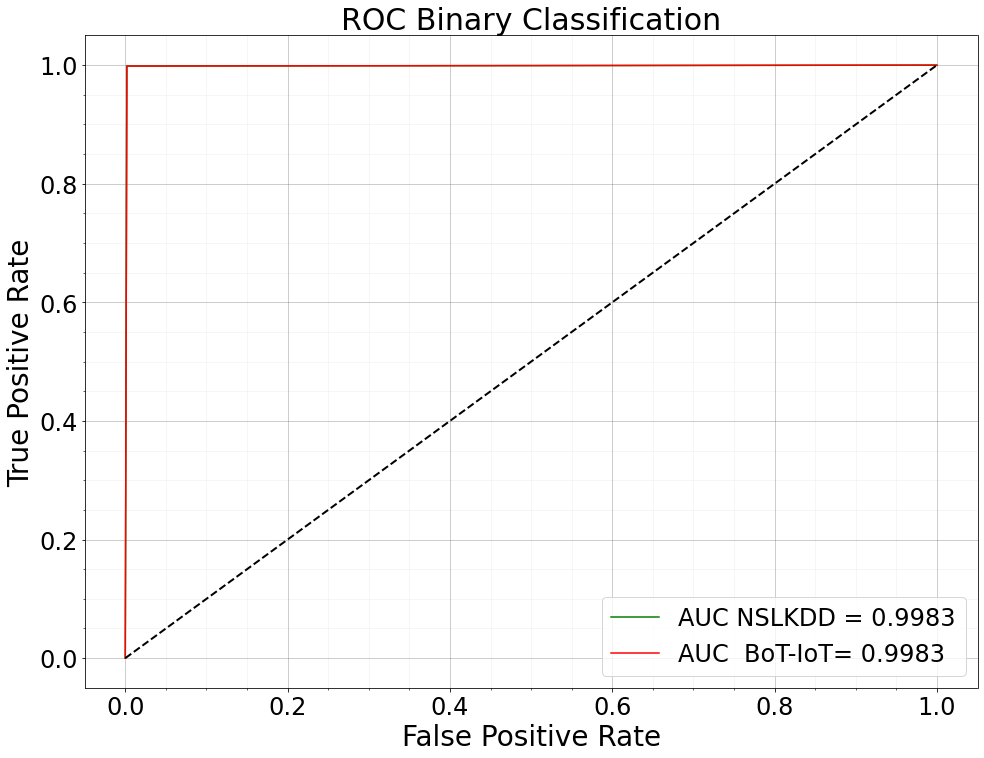

In [ ]:
import sklearn.metrics as metrics

fpr, tpr, threshold = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt



plt.figure(1)
plt.figure(figsize=[16, 12]); 



#plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'g', label = 'AUC NSLKDD = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot(fpr, tpr, 'r', label = 'AUC  BoT-IoT= %0.4f' % roc_auc)
plt.legend(loc = 'lower right')


#plt.plot([0, 1], [0, 1],'b--', lw=2)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize= 24)  
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize= 24)

plt.xlabel('False Positive Rate',fontsize=28)
plt.ylabel('True Positive Rate',fontsize=28)
plt.title('ROC Binary Classification',fontsize=30)
plt.legend(loc="lower right",fontsize=24)

# Show the major grid lines with dark grey lines
plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.4)
# Show the minor grid lines with very faint and almost transparent grey lines
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1)


#plt.savefig('/content/drive/My Drive/Colab Notebooks/Plot/plot1.pdf',dpi=200, papertype='letter', format='pdf', bbox='tight')
#plt.savefig('/content/drive/My Drive/Colab Notebooks/Plot/plot1.jpeg',dpi=200, format='jpeg')
#plt.savefig('/content/drive/My Drive/Colab Notebooks/Plot/plot1.png',dpi=200, format='png')

plt.show()


In [ ]:
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc

lb = LabelBinarizer()
lb.fit(y_test)
y_test1 = lb.transform(y_test)
y_pred1 = lb.transform(y_pred)



# Plot linewidth.
lw = 8
n_classes=2
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test1[:, i], y_pred1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
print(roc_auc)
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test1.ravel(), y_pred1.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.figure(figsize=[16, 12]); # Set dimensions for figure
#plt.plot(fpr["micro"], tpr["micro"],
#         label='micro-average ROC curve (area = {0:0.2f})'
#               ''.format(roc_auc["micro"]),
#         color='deeppink', linestyle=':', linewidth=4)

#plt.plot(fpr["macro"], tpr["macro"],
#         label='macro-average ROC curve (area = {0:0.2f})'
#               ''.format(roc_auc["macro"]),
#         color='navy', linestyle=':', linewidth=4)

colors = cycle(['#4472C4', '#ED7D31'])
#classesname=cycle(['Normal','Attack','Mirai','FileDownload','HeartBeat','C&C','C&C-Torii','PortScan','DDoS','Okiru'])
classesname=cycle(['Normal', 'Anomaly'])

for i, color, classesname in zip(range(n_classes), colors, classesname):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of {0} (area = {1:0.4f})'
             ''.format(classesname+' class', roc_auc[i]))
    plt.plot(fontsize=25)


plt.ylim(-0.03, 1.02)
plt.xlim(-0.03, 1.02)
plt.plot([0, 1], [0, 1], 'k--', lw=2)


plt.xticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize= 18)  
plt.yticks([0, 0.2, 0.4, 0.6, 0.8, 1.0], fontsize= 18)


plt.xlabel('False Positive Rate',fontsize=24)
plt.ylabel('True Positive Rate',fontsize=24)
plt.title('ROC multi-class classification',fontsize=22)
plt.legend(loc="lower right",fontsize=24)
#plt.savefig('/content/drive/My Drive/Colab Notebooks/Plot/plot1.pdf',dpi=200, papertype='letter', format='pdf', bbox='tight')
#plt.savefig('/content/drive/My Drive/Colab Notebooks/Plot/plot1.jpeg',dpi=200, format='jpeg')
#plt.savefig('/content/drive/My Drive/Colab Notebooks/Plot/plot1.png',dpi=200, format='png')
plt.show()

IndexError: ignored

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import LabelBinarizer


lb = LabelBinarizer()
lb.fit(y_test)
y_test = lb.transform(y_test)
y_pred = lb.transform(y_pred)


n_classes = 17
from sklearn.metrics import roc_curve, auc


# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])



# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.figure(figsize=[10, 10], dpi=80); # Set dimensions for figure
    #plt.plot(fpr[i], tpr[i], label='ROC curve (area = (%0.2f)' % round((roc_auc[i]*100),2)+' %)')
    plt.plot(fpr[i], tpr[i], label='ROC curve (Area = %0.2f' % round((roc_auc[i]*100),2)+' %)')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1], fontsize= 12)
    plt.yticks([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1 ], fontsize= 12)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=14)
    plt.ylabel('True Positive Rate',fontsize=14)
    #plt.title('Receiver Operating Characteristic : '+str(i))
    # Show the major grid lines with dark grey lines
    plt.grid(b=True, which='major', color='#666666', linestyle='-',alpha=0.4)
    # Show the minor grid lines with very faint and almost transparent grey lines
    plt.minorticks_on()
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.1)

    plt.title('ROC for Class : '+str(i))
    plt.legend(fontsize= 12, loc="lower right")
    
    plt.show()

In [ ]:
#       Classification Report (Precision, Recall, F1-score)

print()
print()
print(' -------Classification Report (Precision, Recall, F1-score)------')
print()
#Dataset 3 Classes 

#classes =['Normal','Attack','Mirai','FileDownload','HeartBeat','C&C','C&C-Torii','PortScan','DDoS','Okiru']

#Dataset 1,2 and 4 Classes 
#classes =['Normal','DDoS','DoS','MITM ARP Spoofing','MQQT_bruteforce','Mirai','Reconnaissance','Scan','Sparta','Theft']

#classes =['Normal', 'DDoS', 'DoS', 'MITM', 'Mirai', 'MQQT_bruteforce', 'Reconnaissance', 'Scan', 'Sparta', 'Theft','Attack', 'C&C', 'FileDownload', 'HeartBeat', 'Okiru', 'PortScan', 'Torii']

#report = classification_report(y_test, y_pred,digits=4,target_names=classes)
report = classification_report(y_test, y_pred,digits=4)
print(report)

In [ ]:
# Return the indices of maximum values along an axis (matching classes)
print()
print()
print('    ------------------------Confusion Matrix------------------------')
print()
print()
cnf_matrix = confusion_matrix(y_test, y_pred) 
np.savetxt(path+'/cnf_matrix.csv', cnf_matrix, fmt="%d", delimiter=",")
print(cnf_matrix)
print()
print()
print()
print()

In [ ]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=True, title=None, cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized Confusion Matrix'
        else:
            title = 'Confusion Matrix, without Normalization'
    # Compute Confusion Matrix
    cnf = confusion_matrix(y_true, y_pred)


    # Labels appear in the data
    classes = classes
    if normalize:
        cnf = cnf.astype('float') / cnf.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
    else:
        print('Confusion Matrix, without Normalization')

    #print(cnf)

    fig, ax = plt.subplots()
    fig.set_size_inches(12, 12)
    im = ax.imshow(cnf, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cnf.shape[1]),
           yticks=np.arange(cnf.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True Label',
           xlabel='Predicted Label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cnf.max() / 2.
    for i in range(cnf.shape[0]):
        for j in range(cnf.shape[1]):
            ax.text(j, i, format(cnf[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cnf[i, j] > thresh else "black")
    fig.tight_layout()

    return ax


In [ ]:
 plot_confusion_matrix(y_test, y_pred, classes =classes,title='Confusion Matrix, Normalization')

In [ ]:
model.save(path)
print()
print()
print('Model Saved')

In [ ]:
x_test.shape

In [ ]:
# Saving Testing data and Traing Accuracy and Validation Accuracy 
# Saving Training loss and validation loos

import pyarrow as pa
import pyarrow.csv
import urllib.request
import pyarrow.parquet as pq


df1 = pd.DataFrame(x_test)
table = pa.Table.from_pandas(df1)
pq.write_table(table, path+'/x_test.parquet')

df2 = pd.DataFrame(y_test)
table = pa.Table.from_pandas(df2)
pq.write_table(table, path+'/y_test.parquet')


print('Test Data Saved Now Saving Model Loss and Accuracy')

Accuracy_T=history.history['accuracy']
Accuracy_V=history.history['val_accuracy']
np.savetxt(path+"/accuracy_T.csv", Accuracy_T, delimiter=",")
np.savetxt(path+"/accuracy_V.csv", Accuracy_V, delimiter=",")


Loss_T=history.history['loss']
Loss_V=history.history['val_loss']
np.savetxt(path+"/loss_T.csv", Loss_T, delimiter=",")
np.savetxt(path+"/loss_V.csv", Loss_V, delimiter=",")

print('.')
print('.')
print('.')
print('Completed')